In [528]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [530]:
df= pd.read_csv('credit_card_data.csv')

In [531]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [532]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [533]:
df=df.dropna()


In [534]:
df.shape

(3641875, 11)

In [535]:
df.type.value_counts()

type
CASH_OUT    1293148
PAYMENT     1228043
CASH_IN      797079
TRANSFER     301070
DEBIT         22535
Name: count, dtype: int64

In [536]:
df['type'].value_counts()


type
CASH_OUT    1293148
PAYMENT     1228043
CASH_IN      797079
TRANSFER     301070
DEBIT         22535
Name: count, dtype: int64

In [537]:
df['type']=df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})


In [538]:

# Créer un DataFrame avec vos colonnes
data = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                    type    amount  oldbalanceOrg  newbalanceOrig  \
type            1.000000  0.480272       0.256736        0.264290   
amount          0.480272  1.000000       0.008333        0.003607   
oldbalanceOrg   0.256736  0.008333       1.000000        0.999077   
newbalanceOrig  0.264290  0.003607       0.999077        1.000000   
oldbalanceDest  0.274886  0.213628       0.093935        0.095955   
newbalanceDest  0.299631  0.310861       0.064641        0.064554   

                oldbalanceDest  newbalanceDest  
type                  0.274886        0.299631  
amount                0.213628        0.310861  
oldbalanceOrg         0.093935        0.064641  
newbalanceOrig        0.095955        0.064554  
oldbalanceDest        1.000000        0.987030  
newbalanceDest        0.987030        1.000000  


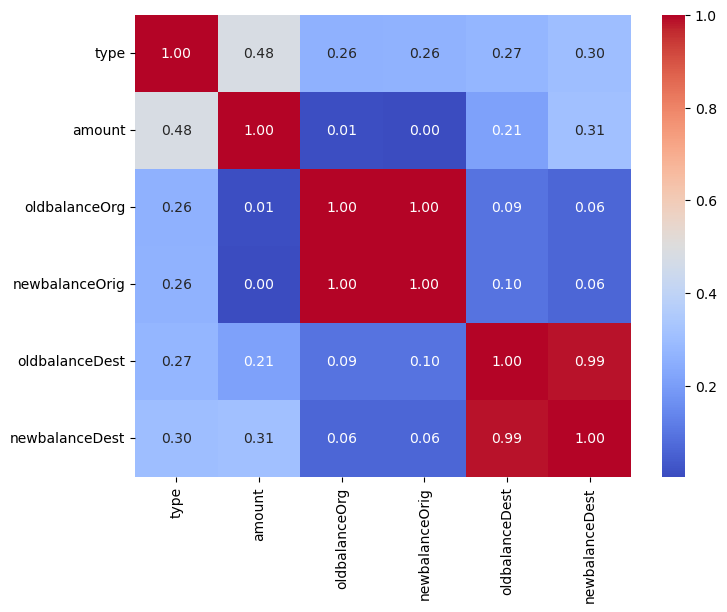

In [541]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [550]:
df_clust=df[df['isFraud']==0]

In [552]:
df_clust.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


In [554]:
# Selecting the relevant features for clustering
X = df_clust[['type','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [556]:
# Preprocessing: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [558]:
# Check for missing values in the selected columns
print(df_clust[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].isnull().sum())

# Option 1: Drop rows with missing values (if applicable)
df_cleaned = df_clust.dropna(subset=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Option 2: Fill missing values (you can fill with 0, mean, or another value based on your context)
df_filled = df_clust.fillna({'amount': 0, 'oldbalanceOrg': 0, 'newbalanceOrig': 0, 'oldbalanceDest': 0, 'newbalanceDest': 0})

# Re-select the relevant features after cleaning
X = df_filled[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Preprocessing: Scaling the data
X_scaled = scaler.fit_transform(X)


amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [560]:
# Apply K-means clustering to create 3 clusters: Normal, Suspect
kmeans = KMeans(n_clusters=2, random_state=42)
df_clust['cluster'] = kmeans.fit_predict(X_scaled)


In [563]:
df_clust.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cluster
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0
5,1,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0,0
6,1,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0,0


In [565]:
# Understanding the clusters
df_clust['cluster'].value_counts()


cluster
0    3386829
1     251933
Name: count, dtype: int64

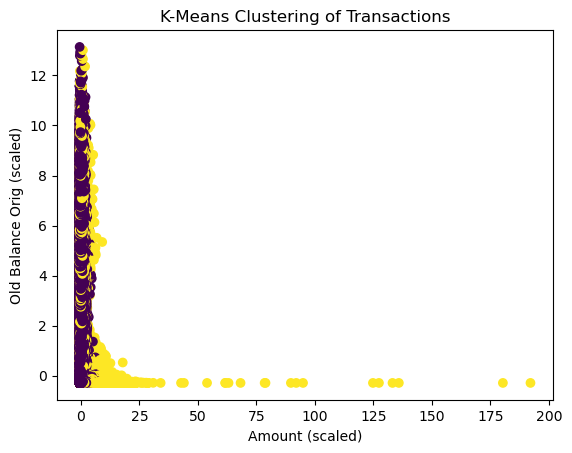

In [483]:
# Visualize the clusters (optional)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_clust['cluster'], cmap='viridis')
plt.xlabel('Amount (scaled)')
plt.ylabel('Old Balance Orig (scaled)')
plt.title('K-Means Clustering of Transactions')
plt.show()

In [567]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [569]:
df_clust.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cluster
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0
5,1,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0,0
6,1,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0,0


In [571]:
# 1. Identifier les colonnes en double
common_columns = df.columns.intersection(df_clust.columns)

# 2. Supprimer les colonnes en double de df_clust avant de concaténer
df_clust_unique = df_clust.drop(columns=common_columns)

# 3. Concaténer df et df_clust_unique (sans colonnes dupliquées)
df_combined = pd.concat([df, df_clust_unique], axis=1)

# Afficher le DataFrame combiné
print(df_combined)

         step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     1    9839.64  C1231006815      170136.00       160296.36   
1           1     1    1864.28  C1666544295       21249.00        19384.72   
2           1     4     181.00  C1305486145         181.00            0.00   
3           1     2     181.00   C840083671         181.00            0.00   
4           1     1   11668.14  C2048537720       41554.00        29885.86   
...       ...   ...        ...          ...            ...             ...   
3641870   275     1    9435.21  C1241316241        3272.44            0.00   
3641871   275     1    8894.11  C1388221738           0.00            0.00   
3641872   275     1   10896.38   C550173474      102848.00        91951.62   
3641873   275     2  105229.69  C1629980247       91951.62            0.00   
3641874   275     1    2021.06  C1249931010      202740.00       200718.94   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  

In [575]:
df_combined.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cluster
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,NaN
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,NaN
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0.0


In [577]:
df_combined.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
cluster           3113
dtype: int64

In [578]:
# Remplacer les valeurs nulles dans 'transaction_type' par 'fraud'
df_combined['cluster'].fillna(2, inplace=True)


In [581]:
df_combined['cluster'] = df_combined['cluster'].astype(int)


In [583]:
df_combined.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
cluster           0
dtype: int64

In [585]:
df_combined['cluster'].value_counts()


cluster
0    3386829
1     251933
2       3113
Name: count, dtype: int64

In [587]:
df=df_combined

In [589]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cluster
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,2
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,2
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0


Ajout corr
le choix de features

In [592]:
df[['type','amount','oldbalanceOrg','oldbalanceDest','newbalanceDest']].head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,2,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


In [594]:
df['isFraud'] = df['cluster']

df = df.drop('cluster', axis=1)


In [596]:
x=df[['type','amount','oldbalanceOrg','oldbalanceDest','newbalanceDest']]


In [598]:
y=df.iloc[:,-2]


In [600]:
y

0          0
1          0
2          2
3          2
4          0
          ..
3641870    0
3641871    0
3641872    0
3641873    0
3641874    0
Name: isFraud, Length: 3641875, dtype: int32

In [602]:
df[df['isFraud']==2].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,2,0.0
3,1,2,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,2,0.0
251,1,4,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,2,0.0
252,1,2,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,2,0.0
680,1,4,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,2,0.0


# DecisionTree

In [605]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)


In [606]:
ytest

1792674    0
2454134    0
378974     0
1297847    0
2551619    0
          ..
1436650    0
2378732    0
2008669    0
3395872    0
1951140    1
Name: isFraud, Length: 728375, dtype: int32

In [609]:
xtest

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1792674,2,116864.67,559.00,0.00,647566.00,764430.67
2454134,3,179041.57,6838.00,185879.57,0.00,0.00
378974,2,177052.17,0.00,0.00,1003965.37,1594574.51
1297847,3,497486.42,70135.00,567621.42,0.00,0.00
2551619,3,49953.39,8280620.74,8330574.13,213337.76,163384.37
...,...,...,...,...,...,...
1436650,2,123994.32,0.00,0.00,3297219.25,3421213.57
2378732,1,8014.45,112321.00,104306.55,0.00,0.00
2008669,2,592891.16,0.00,0.00,1143032.94,1735924.11
3395872,2,403867.43,355.00,0.00,90439.80,494307.22


In [611]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [613]:
model.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [614]:
model.score(xtest,ytest)


0.9991281963274412

In [209]:
import pickle

# Save the trained model
with open('C:/Users/mooha/Documents/EMSI/CreditFraud/mon_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [621]:
model.predict([[4,181,0,21182.0,0,0]])


array([0])

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

In [ ]:
rf.score(xtest,ytest)


In [ ]:
# Faire des prédictions
y_pred = rf.predict(xtest)

In [ ]:
# Évaluer le modèle
print(classification_report(ytest, y_pred))

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Entraîner votre modèle (par exemple, RandomForest)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)  # xtrain et ytrain sont vos données d'entraînement

# Sauvegarder le modèle dans un fichier
with open('C:/Users/mooha/Documents/EMSI/CreditFraud/fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)


# XGBoost

In [417]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialiser et entraîner le modèle
xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [421]:

# Faire des prédictions
y_pred = xgb.predict(xtest)

In [423]:
xgb.score(xtest,ytest)


0.9990471940964476

In [425]:
# Évaluer le modèle
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    677352
           1       1.00      0.99      1.00     50412
           2       0.97      0.70      0.81       611

    accuracy                           1.00    728375
   macro avg       0.99      0.90      0.93    728375
weighted avg       1.00      1.00      1.00    728375



In [429]:
xgb.predict([[2,116864.67,559.00,647566.00,0]])


array([0])

## Test

In [105]:
x_valid,x_test,y_valid,y_test=train_test_split(xtest,ytest,test_size=0.15,random_state=42)


In [107]:
x_valid

,type,amount,oldbalanceOrg,oldbalanceDest
912547,1,25732.75,0.00,0.00
3374240,2,182671.90,15828.00,0.00
198664,1,30537.67,600177.76,0.00
2163971,2,325871.57,0.00,3000193.39
1963390,2,248404.18,16030.00,432825.84
...,...,...,...,...
1651657,2,140071.04,9946.00,168447.66
3540967,3,5189.69,8468891.59,2599305.35
552874,1,8494.18,97648.00,0.00
2518776,2,66190.65,11094.00,438828.13


In [109]:
y_valid

912547     0
3374240    0
198664     0
2163971    0
1963390    0
          ..
1651657    0
3540967    0
552874     0
2518776    0
2135262    0
Name: isFraud, Length: 619118, dtype: int32

In [111]:
# Sélectionner les 50 premières valeurs de x_valid
x_test_sample = x_test[100:150]

# Faire la prédiction sur ces 50 valeurs
predictions = xgb.predict(x_test_sample)

# Afficher les prédictions
print(predictions)


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0]


In [113]:
y_test[100:150]

1805338    0
2009402    0
2938920    0
588170     1
216860     0
352639     0
1771923    0
2708807    0
219465     0
120848     0
1362358    0
2435852    0
136532     0
2778459    0
143228     0
2077051    0
2361071    0
744916     0
2033508    0
580872     0
1504401    0
92432      0
1696337    0
994709     1
203705     0
3444319    0
2629868    1
3258887    0
3429664    0
3029967    0
1398822    0
3106122    0
327563     0
1873209    0
2287636    0
3186184    0
1571923    0
2043194    0
1618994    0
2931888    0
2915083    0
2985789    0
594923     1
1002525    0
3550245    0
2800288    0
3388412    1
11056      1
1435974    0
2236425    0
Name: isFraud, dtype: int32

In [125]:
y_test[y_test==2][100:150]

4103       2
3628711    2
2761649    2
2348202    2
3115166    2
1068006    2
Name: isFraud, dtype: int32

## Deploy model 

In [431]:
import pickle

# Sauvegarder le modèle dans un fichier
with open('C:/Users/mooha/Documents/EMSI/CreditFraud/fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

## Visualisation 

In [226]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire les données à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(xtrain)

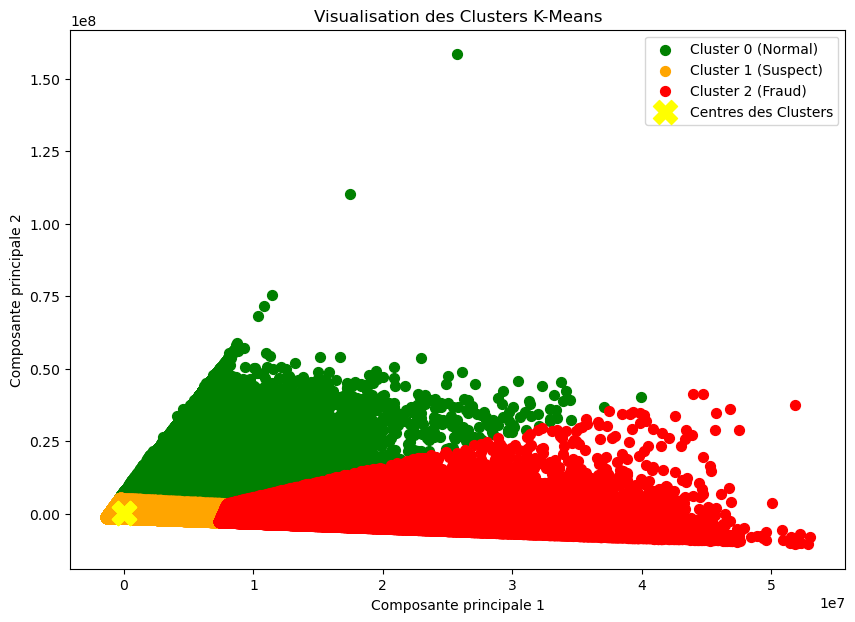

In [246]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire les données à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(xtrain)

# Visualiser les clusters avec K-Means dans l'espace PCA
plt.figure(figsize=(10, 7))

# Normal en vert (Cluster 1)
plt.scatter(X_train_pca[y_kmeans_train == 1, 0], X_train_pca[y_kmeans_train == 1, 1], 
            s=50, c='green', label='Cluster 0 (Normal)')
# Suspect en orange (Cluster 0)
plt.scatter(X_train_pca[y_kmeans_train == 0, 0], X_train_pca[y_kmeans_train == 0, 1], 
            s=50, c='orange', label='Cluster 1 (Suspect)')



# Fraude en rouge (Cluster 2)
plt.scatter(X_train_pca[y_kmeans_train == 2, 0], X_train_pca[y_kmeans_train == 2, 1], 
            s=50, c='red', label='Cluster 2 (Fraud)')

# Visualiser les centres des clusters en jaune
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='X', label='Centres des Clusters')

plt.title('Visualisation des Clusters K-Means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()


In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Supposons que xtrain et xtest soient déjà définis comme vos données d'entraînement et de test respectivement
# Et que y_true_train et y_true_test soient les étiquettes réelles associées aux données d'entraînement et de test

# Appliquer K-Means pour 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(xtrain)

# Prédire les clusters pour l'ensemble d'entraînement et de test
y_kmeans_train = kmeans.predict(xtrain)
y_kmeans_test = kmeans.predict(xtest)

# Mapper les clusters aux étiquettes réelles (c'est-à-dire, trouver le cluster avec la majorité des labels réels pour chaque cluster)
def map_clusters_to_labels(clusters, true_labels):
    cluster_labels = np.zeros(clusters.max() + 1)
    for cluster in np.unique(clusters):
        cluster_labels[cluster] = np.bincount(true_labels[clusters == cluster]).argmax()
    return cluster_labels

# Mapper les clusters aux étiquettes (si vous avez des étiquettes réelles pour l'entraînement)
if 'y_true_train' in globals():
    cluster_labels = map_clusters_to_labels(y_kmeans_train, y_true_train)

    # Prédictions étiquetées
    y_kmeans_train_labeled = cluster_labels[y_kmeans_train]
    y_kmeans_test_labeled = cluster_labels[y_kmeans_test]

    # Calculer la matrice de confusion et le rapport de classification pour les données d'entraînement
    print("Matrice de confusion (entraînement) :")
    print(confusion_matrix(y_true_train, y_kmeans_train_labeled))

    print("Rapport de classification (entraînement) :")
    print(classification_report(y_true_train, y_kmeans_train_labeled))

    # Calculer la matrice de confusion et le rapport de classification pour les données de test (si les étiquettes sont disponibles)
    if 'y_true_test' in globals():
        print("Matrice de confusion (test) :")
        print(confusion_matrix(y_true_test, y_kmeans_test_labeled))

        print("Rapport de classification (test) :")
        print(classification_report(y_true_test, y_kmeans_test_labeled))
else:
    # Si les étiquettes réelles ne sont pas disponibles, simplement afficher les comptes des clusters
    print("Clusters formés sur les données d'entraînement :")
    print(pd.Series(y_kmeans_train).value_counts())

    print("Clusters formés sur les données de test :")
    print(pd.Series(y_kmeans_test).value_counts())


Clusters formés sur les données d'entraînement :
0    2632298
1     147369
2     133833
Name: count, dtype: int64
Clusters formés sur les données de test :
0    658332
1     36859
2     33184
Name: count, dtype: int64


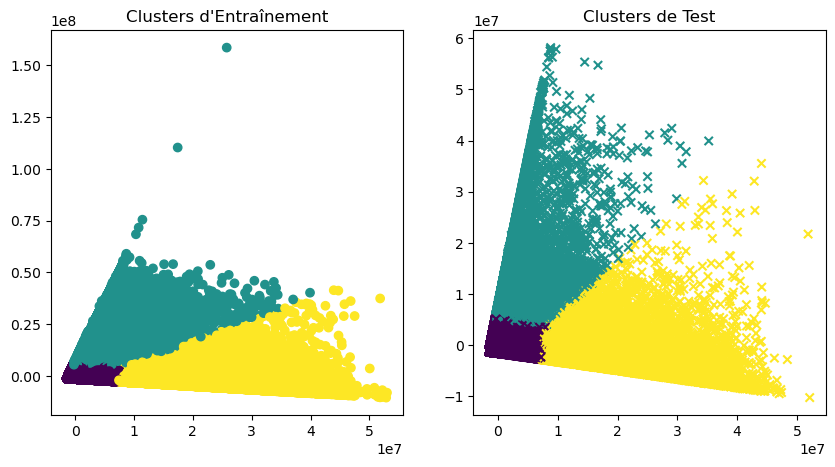

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire la dimensionnalité des données pour la visualisation
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

plt.figure(figsize=(10, 5))

# Visualiser les clusters d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(xtrain_pca[:, 0], xtrain_pca[:, 1], c=y_kmeans_train, cmap='viridis', marker='o')
plt.title('Clusters d\'Entraînement')

# Visualiser les clusters de test
plt.subplot(1, 2, 2)
plt.scatter(xtest_pca[:, 0], xtest_pca[:, 1], c=y_kmeans_test, cmap='viridis', marker='x')
plt.title('Clusters de Test')

plt.show()
